<a href="https://colab.research.google.com/github/Farmhouse121/Financial-Data-Science-in-Python/blob/main/Alphas/Market_Return_by_Political_Party.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from my_library import *

14:12:26 Starting...
14:12:26 Installing yfinance into Google notebook...
14:12:37 Installing arch into Google notebook...
14:12:52 Initialized.


# Get the Data
### Get Presidents Data

In [2]:
presidents=(p:=pd.read_html('https://en.wikipedia.org/wiki/List_of_presidents_of_the_United_States')[0]).set_index(p.columns[0]).iloc[:,[1,2,4]]
presidents['Term Begins']=presidents.iloc[:,1].apply(lambda x:pd.Period(" ".join(x.split(' ')[:3]).split("[")[0],'D'))
presidents['Term Ends']=presidents.iloc[:,1].apply(lambda x:pd.Period(" ".join(x.split(' ')[4:]).split("[")[0] if 'Incumbent' not in x else today(),'D'))
presidents['Party']=presidents.iloc[:,2].str.replace(r"\[.+\]","",regex=True)
presidents['President']=presidents[presidents.columns[0]].apply(lambda x:x.split(' (')[0])
presidents=presidents[presidents.columns[-4:]]
presidents.index.name='President'
display(presidents)

,Term Begins,Term Ends,Party,President
President,,,,
1,1789-04-30,1797-03-04,Unaffiliated,George Washington
2,1797-03-04,1801-03-04,Federalist,John Adams
3,1801-03-04,1809-03-04,Democratic- Republican,Thomas Jefferson
4,1809-03-04,1817-03-04,Democratic- Republican,James Madison
5,1817-03-04,1825-03-04,Democratic- Republican,James Monroe
6,1825-03-04,1829-03-04,Democratic- Republican National Republican,John Quincy Adams
7,1829-03-04,1837-03-04,Democratic,Andrew Jackson
8,1837-03-04,1841-03-04,Democratic,Martin Van Buren
9,1841-03-04,1841-04-04,Whig,William Henry Harrison


### Get Market Data

In [3]:
data,ticker_name=download(ticker:='^GSPC',auto_adjust=True).xs(ticker,axis=1,level=1),'S&P 500 Index'
data['Return']=data['Close'].pct_change()*hundred
data.columns.name=ticker_name
data.dropna(inplace=True)
data.index=list(map(lambda x:pd.Period(x,'D'),data.index))
display(data)

[*********************100%***********************]  1 of 1 completed


S&P 500 Index,Close,High,Low,Open,Volume,Return
1928-01-03,17.760000,17.760000,17.760000,17.760000,0,0.566254
1928-01-04,17.719999,17.719999,17.719999,17.719999,0,-0.225230
1928-01-05,17.549999,17.549999,17.549999,17.549999,0,-0.959368
1928-01-06,17.660000,17.660000,17.660000,17.660000,0,0.626784
1928-01-09,17.500000,17.500000,17.500000,17.500000,0,-0.906001
...,...,...,...,...,...,...
2025-04-09,5456.899902,5481.339844,4948.430176,4965.279785,9489600000,9.515388
2025-04-10,5268.049805,5353.149902,5115.270020,5353.149902,6677140000,-3.460758
2025-04-11,5363.359863,5381.459961,5220.770020,5255.560059,5602550000,1.809210
2025-04-14,5405.970215,5459.459961,5358.020020,5441.959961,5031440000,0.794471


### Make a Ribbon Candy Plot

14:13:02 Wrote figure to Level of S&P 500 Index and Presidential Party.png.


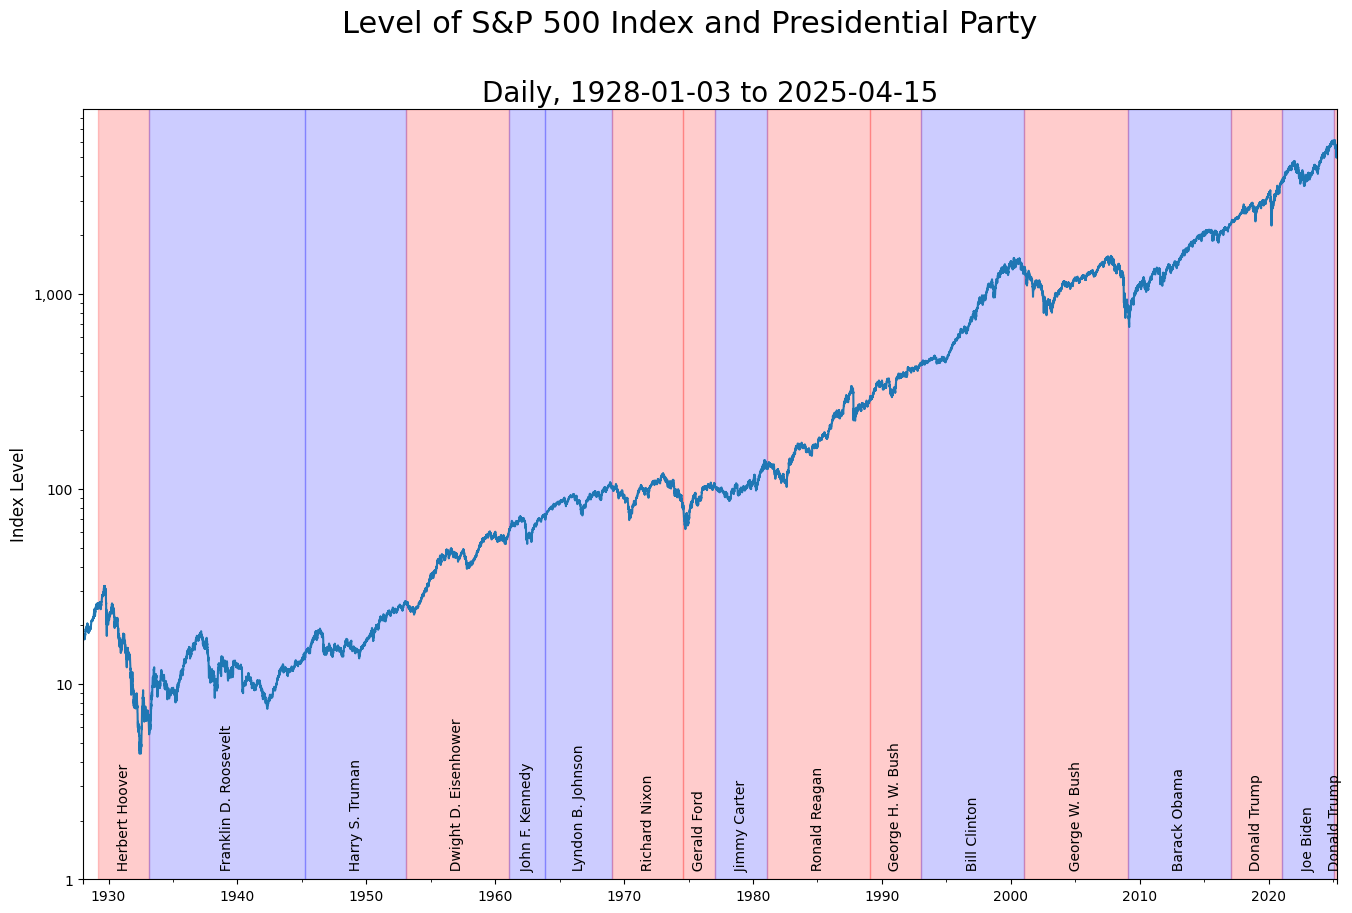

In [4]:
figure,plot=pl.subplots(figsize=(ten*GoldenRatio,ten))
data['Close'].plot(ax=plot)
plot.set_yscale('log')
plot.yaxis.set_major_formatter(CountLabels())
plot.set_ylabel('Index Level',fontsize=12)

for president in [p for p in presidents.index if presidents.loc[p,'Term Begins']>data.index[0]]:
    plot.axvspan(start:=presidents.loc[president,'Term Begins'],end:=presidents.loc[president,'Term Ends'],
                 color='blue' if presidents.loc[president,'Party']=='Democratic' else 'red',alpha=0.2)
    plot.text(xa:=(start+(end-start).n//2),ya:=one,"  "+presidents.loc[president,"President"],ha='center',va='bottom',rotation=90)

plot.set_ylim(ya,None)
figure.suptitle(title:="Level of %s and Presidential Party" % ticker_name,fontsize=22)
plot.set_title(subtitle:="Daily, %s to %s" % (data.index[0].strftime("%Y-%m-%d"),data.index[-1].strftime("%Y-%m-%d")),fontsize=20)
figure.savefig(filename:=title+".png",dpi=300,bbox_inches='tight')
nprint("Wrote figure to %s." % filename)

### Merge the Data and Perform Classic $t$ Test and ANOVA Analysis

In [5]:
from scipy.stats import t as tdensity
from statsmodels.formula.api import ols as OLSformula
from statsmodels.stats.anova import anova_lm

merged=presidents.set_index('Term Begins').merge(data,left_index=True,right_index=True,how='outer').ffill().dropna().drop(columns='Term Ends',axis=1)
merged.index.name='Date'
display(merged)

try:
    merged.to_csv(filename:='/content/drive/MyDrive/presidents.csv')
    nprint("Wrote data to %s." % filename)

except:
    nprint("Could not write data to Google drive.")

nprint("t Test for Zero Mean")
groups=merged[['Party','Return']].groupby('Party')
grouped=groups.count().rename(columns={'Return':'Sample'})
grouped['Mean']=groups.mean()
grouped['Std.Dev.']=groups.std()
grouped['Variance']=groups.var()
grouped['Std.Err.']=np.sqrt(grouped['Variance']/grouped['Sample'])
grouped['t Statistic']=grouped['Mean']/grouped['Std.Err.']
grouped['p Value']=list(map(lambda x:min([x,one-x])*two,list(tdensity.cdf(grouped['t Statistic'],grouped['Sample']-one))))
grouped['Significance']=grouped['p Value'].apply(lambda x:'***' if x<=0.001 else '**' if x<=0.01 else '*' if x<0.05 else '')
grouped.index.name='Groups'
display(grouped.sort_values("p Value"))

nprint("One Way ANOVA Analysis by Party")
fit=OLSformula("Return ~ Party",merged).fit()
anova=anova_lm(fit,typ=2).rename(columns={'sum_sq':'Sum of Squares','df':'d.o.f.','PR(>F)':'p Value','F':'F Statistic'})
anova['Significance']=anova['p Value'].apply(lambda x:'***' if x<=0.001 else '**' if x<=0.01 else '*' if x<0.05 else '')
anova.index=['Between Groups','Within Groups']
anova.index.name='Variation'
display(anova.replace(np.nan,""))

,Party,President,Close,High,Low,Open,Volume,Return
Date,,,,,,,,
1928-01-03,Republican,Calvin Coolidge,17.760000,17.760000,17.760000,17.760000,0.000000e+00,0.566254
1928-01-04,Republican,Calvin Coolidge,17.719999,17.719999,17.719999,17.719999,0.000000e+00,-0.225230
1928-01-05,Republican,Calvin Coolidge,17.549999,17.549999,17.549999,17.549999,0.000000e+00,-0.959368
1928-01-06,Republican,Calvin Coolidge,17.660000,17.660000,17.660000,17.660000,0.000000e+00,0.626784
1928-01-09,Republican,Calvin Coolidge,17.500000,17.500000,17.500000,17.500000,0.000000e+00,-0.906001
...,...,...,...,...,...,...,...,...
2025-04-09,Republican,Donald Trump,5456.899902,5481.339844,4948.430176,4965.279785,9.489600e+09,9.515388
2025-04-10,Republican,Donald Trump,5268.049805,5353.149902,5115.270020,5353.149902,6.677140e+09,-3.460758
2025-04-11,Republican,Donald Trump,5363.359863,5381.459961,5220.770020,5255.560059,5.602550e+09,1.809210


14:13:07 Wrote data to /content/drive/MyDrive/presidents.csv.
14:13:07 t Test for Zero Mean


,Sample,Mean,Std.Dev.,Variance,Std.Err.,t Statistic,p Value,Significance
Groups,,,,,,,,
Democratic,12998,0.043842,1.120798,1.256188,0.009831,4.459698,0.000008,***
Republican,11442,0.015933,1.275192,1.626114,0.011921,1.336538,0.181400,


14:13:07 One Way ANOVA Analysis


,Sum of Squares,d.o.f.,F Statistic,p Value,Significance
Variation,,,,,
Between Groups,4.739903,1.0,3.316068,0.068618,
Within Groups,34931.055415,24438.0,,,


### ANOVA by President

In [11]:
nprint("t Test for Zero Mean")
groups=merged[[g:='President','Return']].groupby(g)
grouped=groups.count().rename(columns={'Return':'Sample'})
grouped['Mean']=groups.mean()
grouped['Std.Dev.']=groups.std()
grouped['Variance']=groups.var()
grouped['Std.Err.']=np.sqrt(grouped['Variance']/grouped['Sample'])
grouped['t Statistic']=grouped['Mean']/grouped['Std.Err.']
grouped['p Value']=list(map(lambda x:min([x,one-x])*two,list(tdensity.cdf(grouped['t Statistic'],grouped['Sample']-one))))
grouped['Significance']=grouped['p Value'].apply(lambda x:'***' if x<=0.001 else '**' if x<=0.01 else '*' if x<0.05 else '')
grouped.index.name='Groups'
display(grouped.sort_values("p Value"))

nprint("One Way ANOVA Analysis by President")
fit=OLSformula("Return ~ President",merged).fit()
anova=anova_lm(fit,typ=2).rename(columns={'sum_sq':'Sum of Squares','df':'d.o.f.','PR(>F)':'p Value','F':'F Statistic'})
anova['Significance']=anova['p Value'].apply(lambda x:'***' if x<=0.001 else '**' if x<=0.01 else '*' if x<0.05 else '')
anova.index=['Between Groups','Within Groups']
anova.index.name='Variation'
display(anova.replace(np.nan,""))

14:15:22 t Test for Zero Mean


,Sample,Mean,Std.Dev.,Variance,Std.Err.,t Statistic,p Value,Significance
Groups,,,,,,,,
Dwight D. Eisenhower,2016,0.043818,0.712095,0.507079,0.015860,2.762847,0.005782,**
Bill Clinton,2021,0.060657,0.988978,0.978078,0.021999,2.757278,0.005881,**
Calvin Coolidge,291,0.135352,0.959289,0.920236,0.056235,2.406911,0.016713,*
Barack Obama,2015,0.054551,1.089205,1.186367,0.024265,2.248184,0.024672,*
Lyndon B. Johnson,1271,0.029415,0.560185,0.313807,0.015713,1.872002,0.061436,
Ronald Reagan,2024,0.043819,1.110783,1.233840,0.024690,1.774751,0.076089,
Harry S. Truman,1938,0.035914,0.909431,0.827065,0.020658,1.738501,0.082281,
George H. W. Bush,1011,0.044785,0.846065,0.715827,0.026609,1.683080,0.092669,
Joe Biden,1005,0.050847,1.040629,1.082910,0.032826,1.549013,0.121694,


14:15:23 One Way ANOVA Analysis by President


,Sum of Squares,d.o.f.,F Statistic,p Value,Significance
Variation,,,,,
Between Groups,36.037609,16.0,1.576205,0.066149,
Within Groups,34899.757709,24423.0,,,


## Model with Non-Normal Asymmetric GARCH
### Baseline OLS Regression with Indicator Variables (Normal Homoskedastic Innovations)

In [14]:
from statsmodels.regression.linear_model import OLS

nprint("Baseline OLS regression with indicator variables. This should produce *exactly* the same results as the conditional means above.")
display(design:=pd.get_dummies(merged['Party'],columns=['Party'],dtype=float).merge(merged['Return'],left_index=True,right_index=True))
fit=ols_fit=OLS(design['Return'],design.drop('Return',axis=1)).fit()
nprint(fit.summary())

14:26:55 Baseline OLS regression with indicator variables. This should produce *exactly* the same results as the conditional means above.


,Democratic,Republican,Return
Date,,,
1928-01-03,0.0,1.0,0.566254
1928-01-04,0.0,1.0,-0.225230
1928-01-05,0.0,1.0,-0.959368
1928-01-06,0.0,1.0,0.626784
1928-01-09,0.0,1.0,-0.906001
...,...,...,...
2025-04-09,0.0,1.0,9.515388
2025-04-10,0.0,1.0,-3.460758
2025-04-11,0.0,1.0,1.809210


14:26:55                             OLS Regression Results                            
Dep. Variable:                 Return   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     3.316
Date:                Tue, 15 Apr 2025   Prob (F-statistic):             0.0686
Time:                        14:26:55   Log-Likelihood:                -39043.
No. Observations:               24440   AIC:                         7.809e+04
Df Residuals:                   24438   BIC:                         7.811e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Democratic     0.0438      0.010      4.181

### Now Fit a "Vanilla" Asymmetric GARCH Model with Non-Normal Innovations

In [15]:
from scipy.stats import norm

nprint("Fitting GJR-GARCH(1,1,1) Model with GED Innovations")
model=ARX(design["Return"],design.drop('Return',axis=1),constant=False)
model.volatility=GARCH2(1,1,1)
model.distribution=GeneralizedError2()
fit=gjr_fit=model.fit(update_freq=0)
nprint(gjr_fit.summary())

results=pd.DataFrame({'Estimate':fit.params,'Std.Err.':fit.std_err,'Null Value':[zero]*2+[np.nan]*4+[two]})
results['t Score']=(results['Estimate']-results['Null Value'])/results['Std.Err.']
results['p Value']=list(map(lambda x:min(norm.cdf(x),norm.sf(x))*two,results['t Score']))
display(results.replace(np.nan,""))
nprint("Z Score for Drift Coeficient Difference: {:.2f}".format(Z:=(results.loc[results.index[1],'Estimate']-results.loc[results.index[0],'Estimate'])/(results.head(2)['Std.Err.']**two).sum()**half))

14:26:58 Fitting GJR-GARCH(1,1,1) Model with GED Innovations
Optimization terminated successfully    (Exit mode 0)
            Current function value: 31466.29802657896
            Iterations: 20
            Function evaluations: 185
            Gradient evaluations: 20
14:26:59                               AR-X - GJR-GARCH Model Results                              
Dep. Variable:                             Return   R-squared:                      -0.000
Mean Model:                                  AR-X   Adj. R-squared:                 -0.000
Vol Model:                              GJR-GARCH   Log-Likelihood:               -31466.3
Distribution:      Generalized Error Distribution   AIC:                           62946.6
Method:                        Maximum Likelihood   BIC:                           63003.3
                                                    No. Observations:                24440
Date:                            Tue, Apr 15 2025   Df Residuals:                  

,Estimate,Std.Err.,Null Value,t Score,p Value
Democratic,0.048162,0.005668,0.0,8.497292,0.0
Republican,0.049303,0.006836,0.0,7.21246,0.0
omega,0.010190,0.001405,,,
alpha[1],0.032741,0.004079,,,
gamma[1],0.101139,0.008944,,,
beta[1],0.908500,0.006545,,,
nu,1.306996,0.022683,2.0,-30.55231,0.0


14:26:59 Z Score for Drift Coeficient Difference: 0.13


In [31]:
# add akaike
from scipy.stats import chi2

aic=pd.DataFrame({
    'Model':['OLS','GJR-GARCH(1,1,1)'],
    'AIC':[ols_fit.aic,gjr_fit.aic],
    '-logL':[ols_fit.llf,gjr_fit.loglikelihood],
    'params':[ols_fit.params.shape[0]-1,gjr_fit.params.shape[0]-2]
}).set_index('Model')
aic.loc['Change']=aic.diff().iloc[-1]
aic.loc['Change','Chi.Sq.']=aic.loc['Change','-logL']*two
aic.loc['Change','p Value']=chi2.sf(aic.loc['Change','Chi.Sq.'],aic.loc['Change','params'])
display(aic.replace(np.nan,""))

,AIC,-logL,params,Chi.Sq.,p Value
Model,,,,,
OLS,78090.587105,-39043.293553,1.0,,
"GJR-GARCH(1,1,1)",62946.596053,-31466.298027,5.0,,
Change,-15143.991052,7576.995526,4.0,15153.991052,0.0


In [26]:
ols_fit.params.shape[0]

2